# COMP_SCI_7318 - Assignment 1 - Predict diabetes using Perceptron

## Walter Rowlands - a1867404

### Trimester 3, 2022

### Import libraries

For this assignment, the following packages were implemented as shown below.

In [1]:
### Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

### Load dataset

Read the diabetes dataset in as a Pandas DataFrame. Then add column headers and visualise some rows.

In [2]:
### Load dataset into Pandas Dataframe
path = 'C:\\Uni\\GDAIML\\COMPSCI7318.Deep_Learning\\Assignments\\Assignment_1\\diabetes.csv'
df = pd.read_csv(path, header=None)

In [3]:
### Add headers and visualise some rows
df.columns = ['Label', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']
df.head(20)

,Label,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,-1,6,148,72,35,0,33.599998,0.627,50
1,1,1,85,66,29,0,26.600000,0.351,31
2,-1,8,183,64,0,0,23.299999,0.672,32
3,1,1,89,66,23,94,28.100000,0.167,21
4,-1,0,137,40,35,168,43.099998,2.288,33
5,1,5,116,74,0,0,25.600000,0.201,30
6,-1,3,78,50,32,88,31.000000,0.248,26
7,1,10,115,0,0,0,35.299999,0.134,29
8,-1,2,197,70,45,543,30.500000,0.158,53
9,-1,8,125,96,0,0,0.000000,0.232,54


### Data exploration and preprocessing

Below, we explore the nature of the diabetes dataset. This includes using some common tabulations and visual techniques to view the spread, shape, and centre of the feature distributions.

We additionally check for the presence of any null values, duplicates or outlier values. Where required, some preprocessing techniques such as imputation are performed.

In [4]:
### Review dataset size, data types and check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Label          768 non-null    int64  
 1   Pregnancies    768 non-null    int64  
 2   Glucose        768 non-null    int64  
 3   BloodPressure  768 non-null    int64  
 4   SkinThickness  768 non-null    int64  
 5   Insulin        768 non-null    int64  
 6   BMI            768 non-null    float64
 7   DPF            768 non-null    float64
 8   Age            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<AxesSubplot:title={'center':'Label'}>,
        <AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>],
       [<AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DPF'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

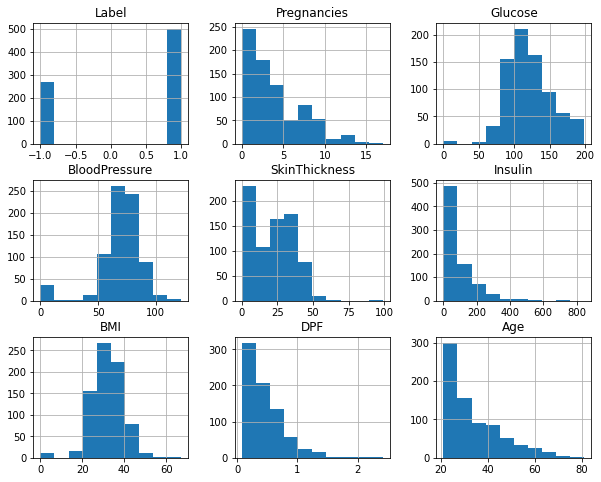

In [5]:
### Generate histograms for each variables to visualise spread, shape and centre of distributions
df.hist(figsize = (10, 8))

<AxesSubplot:>

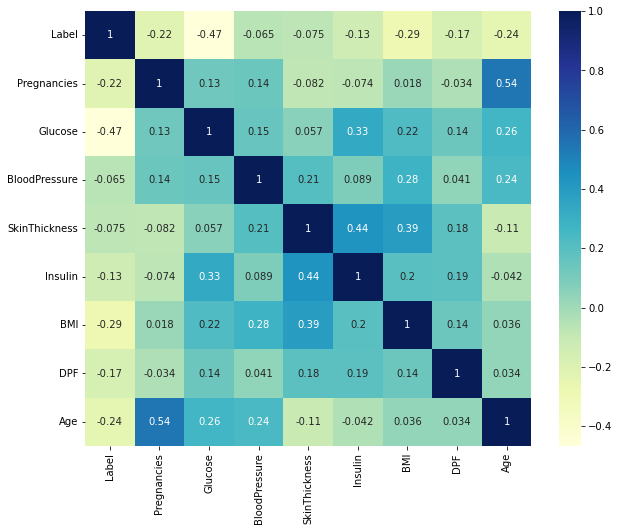

In [6]:
### Produce pairwise correlation matrix and visualise variable correlation using a heatmap
corrmat = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corrmat, annot = True, cmap = 'YlGnBu')

In [7]:
### View descriptive statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Label,768.0,0.302083,0.953903,-1.000,-1.000000,1.0000,1.000000,1.000000
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.0000,6.000000,17.000000
Glucose,768.0,120.894531,31.972618,0.000,99.000000,117.0000,140.250000,199.000000
BloodPressure,768.0,69.105469,19.355807,0.000,62.000000,72.0000,80.000000,122.000000
SkinThickness,768.0,20.536458,15.952218,0.000,0.000000,23.0000,32.000000,99.000000
Insulin,768.0,79.799479,115.244002,0.000,0.000000,30.5000,127.250000,846.000000
BMI,768.0,31.992578,7.884160,0.000,27.299999,32.0000,36.599998,67.099998
DPF,768.0,0.471876,0.331329,0.078,0.243750,0.3725,0.626250,2.420000
Age,768.0,33.240885,11.760232,21.000,24.000000,29.0000,41.000000,81.000000


In [8]:
### Conduct data cleaning operations
# Drop duplicate rows (if any)
df = df.drop_duplicates()
print("Number of rows after duplicate removal:", df.shape[0])

# Replace 0 values with NaN before applying fillna()
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure',
                                                                          'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Now replace NaN values with appropriate imputed values for respective attributes
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True) #normal dist
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True) #normal dist
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True) #skewed dist
df['Insulin'].fillna(df['Insulin'].median(), inplace = True) #skewed dist
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

# check for NaN values post-processing
df.isnull().sum()

Number of rows after duplicate removal: 768


Label            0
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
dtype: int64

In [9]:
### View updated description of data to verify data preprocessing success
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Label,768.0,0.302083,0.953903,-1.000000,-1.00000,1.000000,1.000000,1.000000
Pregnancies,768.0,3.845052,3.369578,0.000000,1.00000,3.000000,6.000000,17.000000
Glucose,768.0,121.686763,30.435949,44.000000,99.75000,117.000000,140.250000,199.000000
BloodPressure,768.0,72.405184,12.096346,24.000000,64.00000,72.202592,80.000000,122.000000
SkinThickness,768.0,29.108073,8.791221,7.000000,25.00000,29.000000,32.000000,99.000000
Insulin,768.0,140.671875,86.383060,14.000000,121.50000,125.000000,127.250000,846.000000
BMI,768.0,32.457464,6.875151,18.200001,27.50000,32.400002,36.599998,67.099998
DPF,768.0,0.471876,0.331329,0.078000,0.24375,0.372500,0.626250,2.420000
Age,768.0,33.240885,11.760232,21.000000,24.00000,29.000000,41.000000,81.000000


### Data splitting

The preprocessed data is divided into feature and target variables, then subsequently into training and test datasets to be used in the models. An 80:20 split (training:test) is employed via Sklearn.

Standardised scaling was applied to normalise the data to account for any extreme values.

In [10]:
### Split data into training and test sets
X = df.loc[:, df.columns != 'Label']
y = df.loc[:, 'Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
### Apply standardised scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Model construction and experimentation

The single layer perceptron is implemented using a Python Class below. The Sklearn library is called subsequently to employ the  multilayer perceptron model. Within these code cells, model parameters were modified to explore the influence on performance and model outcomes.

**Please note:** Not all the experiments and their results are shown below. The experiments were conducted iteratively. After a test was conducted, the performance metrics were tabulated (as seen in the associated report), then model parameters were tuned to conduct the next test.

##### Single layer perceptron

In [12]:
### Construct single layer perceptron and fit to training data, then make predictions
class Perceptron(object):

    def __init__(self, learning_rate = 1, n_iter = 1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[1] += update
                errors += int(update != 0)
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):    
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def score(self, X, y, sample_weight=None):
        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
    
# Fit the model
slp = Perceptron(0.1, 100) ##### EDIT MODEL INPUT VARIABLES HERE
slp.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred_slp = slp.predict(X_test_scaled)

##### Multilayer perceptron

In [13]:
### Construct multilayer perceptron using Sklearn and fit to training data, then make predictions
mlp = MLPClassifier(hidden_layer_sizes = (100,), solver = 'sgd', learning_rate_init = 0.001, max_iter = 200, verbose = True)
mlp.fit(X_train_scaled, y_train) ##### EDIT MODEL INPUT VARIABLES ABOVE

# Make predictions on test data
y_pred_mlp = mlp.predict(X_test_scaled)

Iteration 1, loss = 0.67369652
Iteration 2, loss = 0.67100540
Iteration 3, loss = 0.66661270
Iteration 4, loss = 0.66138331
Iteration 5, loss = 0.65557178
Iteration 6, loss = 0.64980122
Iteration 7, loss = 0.64379395
Iteration 8, loss = 0.63805047
Iteration 9, loss = 0.63256984
Iteration 10, loss = 0.62701851
Iteration 11, loss = 0.62168580
Iteration 12, loss = 0.61655827
Iteration 13, loss = 0.61154005
Iteration 14, loss = 0.60697305
Iteration 15, loss = 0.60233960
Iteration 16, loss = 0.59772327
Iteration 17, loss = 0.59343039
Iteration 18, loss = 0.58954351
Iteration 19, loss = 0.58579526
Iteration 20, loss = 0.58224098
Iteration 21, loss = 0.57903552
Iteration 22, loss = 0.57578252
Iteration 23, loss = 0.57253278
Iteration 24, loss = 0.56941595
Iteration 25, loss = 0.56649404
Iteration 26, loss = 0.56359494
Iteration 27, loss = 0.56078922
Iteration 28, loss = 0.55821315
Iteration 29, loss = 0.55588626
Iteration 30, loss = 0.55342604
Iteration 31, loss = 0.55106809
Iteration 32, los

C:\Users\wrowlands\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Performance evaluation

The performance metrics for both the single layer and multilayer perceptron models are computed below. We call a range of functions from the Sklearn library to calculate performance metrics including accuracy, precision, recall and F1 score.

A confusion matrix is also generated for both models to provide a visual report that describes 'how' our model is predicting outcomes with respect to true and false positive/negatives.

##### Single layer perceptron

Training data accuracy: 0.691

Testing data performance
Accuracy: 0.682
Precision: 0.805
Recall: 0.667
F1 Score: 0.729


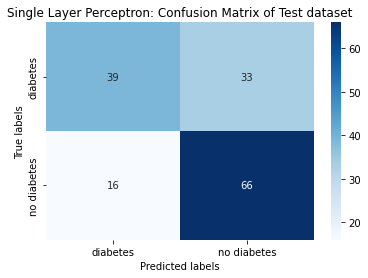

In [14]:
### Compute single layer perceptron results and show
# Report training accuracy
print("Training data accuracy: {:.3f}".format(slp.score(X_train_scaled, y_train)))

# Display test data performance
print("\nTesting data performance")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_slp, y_test)))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred_slp)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred_slp)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_slp)))

# Show test confusion matrix
cm_slp = confusion_matrix(y_pred_slp, y_test)
ax_slp = plt.subplot()
sns.heatmap(cm_slp, annot = True, cmap = 'Blues', ax=ax_slp)

# labels, title and ticks
ax_slp.set_xlabel('Predicted labels')
ax_slp.set_ylabel('True labels')
ax_slp.set_title('Single Layer Perceptron: Confusion Matrix of Test dataset')
ax_slp.xaxis.set_ticklabels(['diabetes', 'no diabetes']) 
ax_slp.yaxis.set_ticklabels(['diabetes', 'no diabetes'])
plt.show()

##### Multilayer perceptron

Training data accuracy: 0.767

Testing data performance
Accuracy: 0.773
Precision: 0.791
Recall: 0.879
F1 Score: 0.833


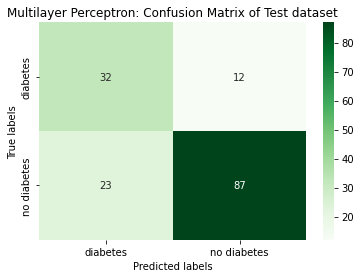

In [15]:
### Compute multilayer perceptron results and show
# Report training accuracy
print("Training data accuracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))

# Display test data performance
print("\nTesting data performance")
print("Accuracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred_mlp)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred_mlp)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_mlp)))

# Show test confusion matrix
cm_mlp = confusion_matrix(y_pred_mlp, y_test)
ax_mlp = plt.subplot()
sns.heatmap(cm_mlp, annot = True, cmap = 'Greens', ax=ax_mlp)

# labels, title and ticks
ax_mlp.set_xlabel('Predicted labels')
ax_mlp.set_ylabel('True labels')
ax_mlp.set_title('Multilayer Perceptron: Confusion Matrix of Test dataset')
ax_mlp.xaxis.set_ticklabels(['diabetes', 'no diabetes']) 
ax_mlp.yaxis.set_ticklabels(['diabetes', 'no diabetes'])
plt.show()